In [2]:
#conda activate pyvizenv

In [3]:
#pip install yfinance

In [103]:
# Import Libraries
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import json
import panel as pn
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
pn.extension()
import plotly.express as px
import yfinance as yf
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Laod .env environment
load_dotenv()


True

In [3]:
# Pull in API Key
api_key = os.getenv("glassnode_api")
type(api_key)


str

In [4]:
# Define crypto currencies to pull
crypto_list = ["BTC", "BCH", "ETH", "LTC", "USDT", "DOGE"]


In [5]:
# Define Market URLs
price_url = 'https://api.glassnode.com/v1/metrics/market/price_usd'
volume_url = 'https://api.glassnode.com/v1/metrics/transactions/transfers_volume_sum'
mkt_cap_url = 'https://api.glassnode.com/v1/metrics/market/marketcap_usd'

# Define Demand URLs
total_addresses_url = 'https://api.glassnode.com/v1/metrics/addresses/count'
sending_addresses_url = 'https://api.glassnode.com/v1/metrics/addresses/sending_count'
receiving_addresses_url = 'https://api.glassnode.com/v1/metrics/addresses/receiving_count'
active_addresses_url = 'https://api.glassnode.com/v1/metrics/addresses/active_count'
transactions_url = 'https://api.glassnode.com/v1/metrics/transactions/count'

# Define Supply URLs
circulating_supply_url = 'https://api.glassnode.com/v1/metrics/supply/current'

# Define Mining Revenue URLs
mining_revenue_sum_url = 'https://api.glassnode.com/v1/metrics/mining/revenue_sum'

# Define Indicator URLs
rhodl_ratio_url = 'https://api.glassnode.com/v1/metrics/indicators/rhodl_ratio'


## BTC API Data Pull

In [6]:
# Price API Request
btc_price_res = requests.get(price_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert price to Pandas Dataframe, set index to time and clean up file
btc_price_df = pd.read_json(btc_price_res.text, convert_dates=['t'])
btc_price_df.columns = ['Date', 'BTC Price']
btc_price_df.set_index('Date', inplace=True) 


# Volume API Request
btc_volume_res = requests.get(volume_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert volume to Pandas Dataframe, set index to time and clean up file
btc_volume_df = pd.read_json(btc_volume_res.text, convert_dates=['t'])
btc_volume_df.columns = ['Date', 'BTC Volume']
btc_volume_df.set_index('Date', inplace=True)



# Market Cap API Request
btc_mkt_cap_res = requests.get(mkt_cap_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Market Cap to Pandas Dataframe, set index to time and clean up file
btc_mkt_cap_df = pd.read_json(btc_mkt_cap_res.text, convert_dates=['t'])
btc_mkt_cap_df.columns = ['Date', 'BTC Market Cap']
btc_mkt_cap_df.set_index('Date', inplace=True)



# Mining API Request
btc_mining_res = requests.get(mining_revenue_sum_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Mining to Pandas Dataframe, set index to time and clean up file
btc_mining_df = pd.read_json(btc_mining_res.text, convert_dates=['t'])
btc_mining_df.columns = ['Date', 'BTC Mining Revenue']
btc_mining_df.set_index('Date', inplace=True)



# RHODL API Request
btc_rhodl_res = requests.get(rhodl_ratio_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert RHODL to Pandas Dataframe, set index to time and clean up file
btc_rhodl_df = pd.read_json(btc_rhodl_res.text, convert_dates=['t'])
btc_rhodl_df.columns = ['Date', 'BTC RHDOL Ratio']
btc_rhodl_df.set_index('Date', inplace=True)


# Supply API Request
btc_supply_res = requests.get(circulating_supply_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Supply to Pandas Dataframe, set index to time and clean up file
btc_supply_df = pd.read_json(btc_supply_res.text, convert_dates=['t'])
btc_supply_df.columns = ['Date', 'BTC Supply']
btc_supply_df.set_index('Date', inplace=True)


# Total Addresses API Request
btc_total_addresses_res = requests.get(total_addresses_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Total Addresses to Pandas Dataframe, set index to time and clean up file
btc_total_addresses_df = pd.read_json(btc_total_addresses_res.text, convert_dates=['t'])
btc_total_addresses_df.columns = ['Date', 'BTC Total Addresses']
btc_total_addresses_df.set_index('Date', inplace=True)


# Sending Addresses API Request
btc_sending_addresses_res = requests.get(sending_addresses_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Sending Addresses to Pandas Dataframe, set index to time and clean up file
btc_sending_addresses_df = pd.read_json(btc_sending_addresses_res.text, convert_dates=['t'])
btc_sending_addresses_df.columns = ['Date', 'BTC Sending Addresses']
btc_sending_addresses_df.set_index('Date', inplace=True)


# Receiving Addresses API Request
btc_receiving_addresses_res = requests.get(receiving_addresses_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Receiving Addresses to Pandas Dataframe, set index to time and clean up file
btc_receiving_addresses_df = pd.read_json(btc_receiving_addresses_res.text, convert_dates=['t'])
btc_receiving_addresses_df.columns = ['Date', 'BTC Receiving Addresses']
btc_receiving_addresses_df.set_index('Date', inplace=True)



# Active Addresses API Request
btc_active_addresses_res = requests.get(active_addresses_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Active Addresses to Pandas Dataframe, set index to time and clean up file
btc_active_addresses_df = pd.read_json(btc_active_addresses_res.text, convert_dates=['t'])
btc_active_addresses_df.columns = ['Date', 'BTC Active Addresses']
btc_active_addresses_df.set_index('Date', inplace=True)



# Transactions API Request
btc_transactions_res = requests.get(transactions_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Active Addresses to Pandas Dataframe, set index to time and clean up file
btc_transactions_df = pd.read_json(btc_transactions_res.text, convert_dates=['t'])
btc_transactions_df.columns = ['Date','BTC Transactions']
btc_transactions_df.set_index('Date', inplace=True)



## BTC Data Table Debugging Cells

In [7]:
# btc_price_df

In [8]:
# btc_volume_df

In [9]:
# btc_mkt_cap_df

In [10]:
# btc_mining_df

In [11]:
# btc_rhodl_df

In [12]:
# btc_supply_df

In [13]:
# btc_total_addresses_df

In [14]:
# btc_sending_addresses_df

In [15]:
# btc_receiving_addresses_df

In [16]:
# btc_active_addresses_df

In [17]:
# btc_transactions_df

## BTC Daily Changes

In [18]:
# Daily change in price column
btc_daily_price_pct_change = btc_price_df.pct_change(1)
btc_daily_price_pct_change.columns = ['BTC Daily Price Change (%)']

# btc_daily_price_pct_change


## BTC Data Aggregating & Cleaning

In [19]:
# Define all the different data frames into a list
btc_frames = [btc_price_df,
              btc_daily_price_pct_change,
              btc_volume_df,
              btc_mkt_cap_df,
              btc_mining_df,
              btc_rhodl_df,
              btc_supply_df,
              btc_total_addresses_df,
              btc_sending_addresses_df,
              btc_receiving_addresses_df,
              btc_active_addresses_df,
              btc_transactions_df]

# Concatenate all the dataframes into one
btc_data = pd.concat(btc_frames, axis=1, join="outer", ignore_index=False)
btc_data


,BTC Price,BTC Daily Price Change (%),BTC Volume,BTC Market Cap,BTC Mining Revenue,BTC RHDOL Ratio,BTC Supply,BTC Total Addresses,BTC Sending Addresses,BTC Receiving Addresses,BTC Active Addresses,BTC Transactions
Date,,,,,,,,,,,,
2009-01-03,NaN,NaN,0.000000e+00,NaN,50.000000,NaN,50.00,1.0,0.0,0.0,0.0,0.0
2009-01-04,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,NaN,1.0,0.0,0.0,0.0,0.0
2009-01-05,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,NaN,1.0,0.0,0.0,0.0,0.0
2009-01-06,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,NaN,1.0,0.0,0.0,0.0,0.0
2009-01-07,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,NaN,1.0,0.0,0.0,0.0,0.0
2009-01-08,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,NaN,1.0,0.0,0.0,0.0,0.0
2009-01-09,NaN,NaN,0.000000e+00,NaN,700.000000,NaN,750.00,15.0,0.0,0.0,0.0,0.0
2009-01-10,NaN,NaN,0.000000e+00,NaN,3050.000000,NaN,3800.00,76.0,0.0,0.0,0.0,0.0
2009-01-11,NaN,NaN,0.000000e+00,NaN,4650.000000,NaN,8450.00,169.0,0.0,0.0,0.0,0.0


## LTC API Data Pull

In [20]:
# Price API Request
ltc_price_res = requests.get(price_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert price to Pandas Dataframe, set index to time and clean up file
ltc_price_df = pd.read_json(ltc_price_res.text, convert_dates=['t'])
ltc_price_df.columns = ['Date', 'LTC Price']
ltc_price_df.set_index('Date', inplace=True) 


# Volume API Request
ltc_volume_res = requests.get(volume_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert volume to Pandas Dataframe, set index to time and clean up file
ltc_volume_df = pd.read_json(ltc_volume_res.text, convert_dates=['t'])
ltc_volume_df.columns = ['Date', 'LTC Volume']
ltc_volume_df.set_index('Date', inplace=True)



# Market Cap API Request
ltc_mkt_cap_res = requests.get(mkt_cap_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Market Cap to Pandas Dataframe, set index to time and clean up file
ltc_mkt_cap_df = pd.read_json(ltc_mkt_cap_res.text, convert_dates=['t'])
ltc_mkt_cap_df.columns = ['Date', 'LTC Market Cap']
ltc_mkt_cap_df.set_index('Date', inplace=True)



# Mining API Request
ltc_mining_res = requests.get(mining_revenue_sum_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Mining to Pandas Dataframe, set index to time and clean up file
ltc_mining_df = pd.read_json(ltc_mining_res.text, convert_dates=['t'])
ltc_mining_df.columns = ['Date', 'LTC Mining Revenue']
ltc_mining_df.set_index('Date', inplace=True)



# # RHODL API Request
# ltc_rhodl_res = requests.get(rhodl_ratio_url,
#                       params={'a': 'LTC',
#                               'i': '24h',
#                               'api_key': api_key})


# # Convert RHODL to Pandas Dataframe, set index to time and clean up file
# ltc_rhodl_df = pd.read_json(ltc_rhodl_res.text, convert_dates=['t'])
# ltc_rhodl_df.columns = ['Date', 'LTC RHDOL Ratio']
# ltc_rhodl_df.set_index('Date', inplace=True)


# Supply API Request
ltc_supply_res = requests.get(circulating_supply_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Supply to Pandas Dataframe, set index to time and clean up file
ltc_supply_df = pd.read_json(ltc_supply_res.text, convert_dates=['t'])
ltc_supply_df.columns = ['Date', 'LTC Supply']
ltc_supply_df.set_index('Date', inplace=True)


# Total Addresses API Request
ltc_total_addresses_res = requests.get(total_addresses_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Total Addresses to Pandas Dataframe, set index to time and clean up file
ltc_total_addresses_df = pd.read_json(ltc_total_addresses_res.text, convert_dates=['t'])
ltc_total_addresses_df.columns = ['Date', 'LTC Total Addresses']
ltc_total_addresses_df.set_index('Date', inplace=True)


# Sending Addresses API Request
ltc_sending_addresses_res = requests.get(sending_addresses_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Sending Addresses to Pandas Dataframe, set index to time and clean up file
ltc_sending_addresses_df = pd.read_json(ltc_sending_addresses_res.text, convert_dates=['t'])
ltc_sending_addresses_df.columns = ['Date', 'LTC Sending Addresses']
ltc_sending_addresses_df.set_index('Date', inplace=True)


# Receiving Addresses API Request
ltc_receiving_addresses_res = requests.get(receiving_addresses_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Receiving Addresses to Pandas Dataframe, set index to time and clean up file
ltc_receiving_addresses_df = pd.read_json(ltc_receiving_addresses_res.text, convert_dates=['t'])
ltc_receiving_addresses_df.columns = ['Date', 'LTC Receiving Addresses']
ltc_receiving_addresses_df.set_index('Date', inplace=True)



# Active Addresses API Request
ltc_active_addresses_res = requests.get(active_addresses_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Active Addresses to Pandas Dataframe, set index to time and clean up file
ltc_active_addresses_df = pd.read_json(ltc_active_addresses_res.text, convert_dates=['t'])
ltc_active_addresses_df.columns = ['Date', 'LTC Active Addresses']
ltc_active_addresses_df.set_index('Date', inplace=True)



# Transactions API Request
ltc_transactions_res = requests.get(transactions_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Active Addresses to Pandas Dataframe, set index to time and clean up file
ltc_transactions_df = pd.read_json(ltc_transactions_res.text, convert_dates=['t'])
ltc_transactions_df.columns = ['Date','LTC Transactions']
ltc_transactions_df.set_index('Date', inplace=True)

## LTC Data Table Debugging Cells

In [21]:
# ltc_price_df.head(5)

In [22]:
# ltc_volume_df.head(5)

In [23]:
# ltc_mkt_cap_df.head(5)

In [24]:
# ltc_mining_df.head(5)

In [25]:
# ltc_rhodl_df.head(5)

In [26]:
# ltc_supply_df.head(5)

In [27]:
# ltc_total_addresses_df.head(5)

In [28]:
# ltc_sending_addresses_df.head(5)

In [29]:
# ltc_receiving_addresses_df.head(5)

In [30]:
# ltc_active_addresses_df.head(5)

In [31]:
# ltc_transactions_df.head(5)

## LTC Daily Changes

In [32]:
# Daily change in price column
ltc_daily_price_pct_change = ltc_price_df.pct_change(1)
ltc_daily_price_pct_change.columns = ['LTC Daily Price Change (%)']

# ltc_daily_price_pct_change

## LTC Data Aggregating & Cleaning

In [33]:
# Define all the different data frames into a list
ltc_frames = [ltc_price_df,
              ltc_daily_price_pct_change,
              ltc_volume_df,
              ltc_mkt_cap_df,
              ltc_mining_df,
#               ltc_rhodl_df,
              ltc_supply_df,
              ltc_total_addresses_df,
              ltc_sending_addresses_df,
              ltc_receiving_addresses_df,
              ltc_active_addresses_df,
              ltc_transactions_df]

# Concatenate all the dataframes into one
ltc_data = pd.concat(ltc_frames, axis=1, join="outer", ignore_index=False)
ltc_data.head()

,LTC Price,LTC Daily Price Change (%),LTC Volume,LTC Market Cap,LTC Mining Revenue,LTC Supply,LTC Total Addresses,LTC Sending Addresses,LTC Receiving Addresses,LTC Active Addresses,LTC Transactions
Date,,,,,,,,,,,
2011-10-13,NaN,NaN,44199.477500,NaN,484100.001000,484250.0,9777.0,849.0,110.0,919.0,92.0
2011-10-14,NaN,NaN,22518.380483,NaN,56100.002000,540350.0,10941.0,425.0,55.0,464.0,62.0
2011-10-15,NaN,NaN,30682.842066,NaN,38100.075000,578450.0,12205.0,764.0,528.0,927.0,438.0
2011-10-16,NaN,NaN,199192.706085,NaN,45750.907071,624250.0,14624.0,3978.0,1592.0,4271.0,1415.0
2011-10-17,NaN,NaN,91493.403856,NaN,38650.356248,662850.0,16975.0,2432.0,1727.0,2705.0,1578.0


## ETH API Data Pull

In [34]:
# Price API Request
eth_price_res = requests.get(price_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})
# Convert price to Pandas Dataframe, set index to time and clean up file
eth_price_df = pd.read_json(eth_price_res.text, convert_dates=['t'])
eth_price_df.columns = ['Date', 'ETH Price']
eth_price_df.set_index('Date', inplace=True) 

# Volume API Request
eth_volume_res = requests.get(volume_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})
# Convert volume to Pandas Dataframe, set index to time and clean up file
eth_volume_df = pd.read_json(eth_volume_res.text, convert_dates=['t'])
eth_volume_df.columns = ['Date', 'ETH Volume']
eth_volume_df.set_index('Date', inplace=True)

# Market Cap API Request
eth_mkt_cap_res = requests.get(mkt_cap_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})
# Convert Market Cap to Pandas Dataframe, set index to time and clean up file
eth_mkt_cap_df = pd.read_json(eth_mkt_cap_res.text, convert_dates=['t'])
eth_mkt_cap_df.columns = ['Date', 'ETH Market Cap']
eth_mkt_cap_df.set_index('Date', inplace=True)


# Total Addresses API Request
eth_total_addresses_res = requests.get(total_addresses_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert to Pandas Dataframe, set index to time and clean up file
eth_total_addresses_df = pd.read_json(eth_total_addresses_res.text, convert_dates=['t'])
eth_total_addresses_df.columns = ['Date', 'ETH Total Addresses']
eth_total_addresses_df.set_index('Date', inplace=True) 

# Sending Addresses API Request
eth_sending_addresses_res = requests.get(sending_addresses_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert to Pandas Dataframe, set index to time and clean up file
eth_sending_addresses_df = pd.read_json(eth_sending_addresses_res.text, convert_dates=['t'])
eth_sending_addresses_df.columns = ['Date', 'ETH Sending Addresses']
eth_sending_addresses_df.set_index('Date', inplace=True) 

# Receiving Addresses API Request
eth_receiving_addresses_res = requests.get(receiving_addresses_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert to Pandas Dataframe, set index to time and clean up file
eth_receiving_addresses_df = pd.read_json(eth_receiving_addresses_res.text, convert_dates=['t'])
eth_receiving_addresses_df.columns = ['Date', 'ETH Receiving Addresses']
eth_receiving_addresses_df.set_index('Date', inplace=True) 

# Active Addresses API Request
eth_active_addresses_res = requests.get(active_addresses_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert to Pandas Dataframe, set index to time and clean up file
eth_active_addresses_df = pd.read_json(eth_active_addresses_res.text, convert_dates=['t'])
eth_active_addresses_df.columns = ['Date', 'ETH Active Addresses']
eth_active_addresses_df.set_index('Date', inplace=True) 

# Transactions Addresses API Request
eth_transactions_res = requests.get(transactions_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert to Pandas Dataframe, set index to time and clean up file
eth_transactions_df = pd.read_json(eth_transactions_res.text, convert_dates=['t'])
eth_transactions_df.columns = ['Date', 'ETH Transactions']
eth_transactions_df.set_index('Date', inplace=True) 


# Circulating Supply API Request
eth_circulating_supply_res = requests.get(circulating_supply_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert Supply to Pandas Dataframe, set index to time and clean up file
eth_circulating_supply_df = pd.read_json(eth_circulating_supply_res.text, convert_dates=['t'])
eth_circulating_supply_df.columns = ['Date', 'ETH Circulating Supply']
eth_circulating_supply_df.set_index('Date', inplace=True)



# Mining API Request
eth_mining_revenue_sum_res = requests.get(mining_revenue_sum_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert Mining to Pandas Dataframe, set index to time and clean up file
eth_mining_revenue_sum_df = pd.read_json(eth_mining_revenue_sum_res.text, convert_dates=['t'])
eth_mining_revenue_sum_df.columns = ['Date', 'ETH Blocks Mined']
eth_mining_revenue_sum_df.set_index('Date', inplace=True)

## ETH Data Table Debugging Cells

In [35]:
# eth_price_df

In [36]:
# total_addresses_df

In [37]:
# sending_addresses_df

In [38]:
# receiving_addresses_df

In [39]:
# active_addresses_df

In [40]:
# eth_mining_revenue_sum_df

In [41]:
# eth_volume_df

In [42]:
# eth_mkt_cap_df

In [43]:
# transactions_df

In [44]:
eth_circulating_supply_df

,ETH Circulating Supply
Date,
2015-07-30,7.204930e+07
2015-07-31,7.208549e+07
2015-08-01,7.211320e+07
2015-08-02,7.214142e+07
2015-08-03,7.216940e+07
2015-08-04,7.219788e+07
2015-08-05,7.222541e+07
2015-08-06,7.225248e+07
2015-08-07,7.227992e+07


## ETH Daily Change

In [45]:
# Daily change in price column
eth_daily_price_pct_change = eth_price_df.pct_change(1)
eth_daily_price_pct_change.columns = ['ETH Daily Price Change (%)']

# ltc_daily_price_pct_change

## ETH Data Aggregating & Cleaning

In [68]:
# Define all the different data frames into a list
eth_frames = [eth_price_df,
              eth_daily_price_pct_change,
              eth_volume_df,
              eth_mkt_cap_df,
              eth_mining_revenue_sum_df,
#               eth_rhodl_df,
              eth_circulating_supply_df,
              eth_total_addresses_df,
              eth_sending_addresses_df,
              eth_receiving_addresses_df,
              eth_active_addresses_df,
              eth_transactions_df]

# Concatenate all the dataframes into one
eth_data = pd.concat(eth_frames, axis=1, join="outer", ignore_index=False).dropna()
eth_data

,ETH Price,ETH Daily Price Change (%),ETH Volume,ETH Market Cap,ETH Blocks Mined,ETH Circulating Supply,ETH Total Addresses,ETH Sending Addresses,ETH Receiving Addresses,ETH Active Addresses,ETH Transactions
Date,,,,,,,,,,,
2015-08-09,0.719830,-0.065132,1.165448e+06,5.507245e+07,27192.380200,7.233504e+07,10894.0,457.0,489.0,731.0,1312.0
2015-08-10,0.700705,-0.026569,1.670884e+06,4.878861e+07,27848.508894,7.236286e+07,11543.0,804.0,749.0,997.0,2027.0
2015-08-11,1.088361,0.553237,1.485697e+06,5.745360e+07,28039.123949,7.239089e+07,13432.0,2119.0,2106.0,2339.0,4955.0
2015-08-12,1.214071,0.115504,7.474474e+05,8.079017e+07,27403.524492,7.241826e+07,13744.0,565.0,673.0,904.0,2009.0
2015-08-13,1.843286,0.518268,1.787811e+06,1.045588e+08,28293.054169,7.244653e+07,14274.0,858.0,989.0,1273.0,2834.0
2015-08-14,1.833362,-0.005384,2.295429e+06,1.450265e+08,31121.073584,7.247763e+07,14810.0,1098.0,1172.0,1592.0,3166.0
2015-08-15,1.674456,-0.086675,4.631229e+06,1.248196e+08,28521.492843,7.250614e+07,15175.0,845.0,1050.0,1309.0,2269.0
2015-08-16,1.569923,-0.062428,1.708589e+06,9.975743e+07,27101.208488,7.253324e+07,15450.0,748.0,976.0,1202.0,2438.0
2015-08-17,1.207885,-0.230609,2.244763e+06,1.003358e+08,28126.549062,7.256136e+07,15729.0,800.0,989.0,1249.0,2512.0


## All Cryptocurrencies Master Merge Table

In [70]:
# Define the cryptocurrencies to be merged
crypto_df_list = [btc_data, ltc_data, eth_data]

# Merge all crypto into one file
all_crypto_data = pd.concat(crypto_df_list, axis=1, join="outer", ignore_index=False).dropna()
all_crypto_data.head()

,BTC Price,BTC Daily Price Change (%),BTC Volume,BTC Market Cap,BTC Mining Revenue,BTC RHDOL Ratio,BTC Supply,BTC Total Addresses,BTC Sending Addresses,BTC Receiving Addresses,...,ETH Daily Price Change (%),ETH Volume,ETH Market Cap,ETH Blocks Mined,ETH Circulating Supply,ETH Total Addresses,ETH Sending Addresses,ETH Receiving Addresses,ETH Active Addresses,ETH Transactions
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-09,267.513289,0.020832,1.240342e+06,3.829455e+09,3569.003486,167.438805,14479025.0,89127314.0,152905.0,223275.0,...,-0.065132,1.165448e+06,5.507245e+07,27192.380200,7.233504e+07,10894.0,457.0,489.0,731.0,1312.0
2015-08-10,264.791755,-0.010173,1.248533e+06,3.841568e+09,4203.568651,166.046989,14483200.0,89272375.0,201821.0,235637.0,...,-0.026569,1.670884e+06,4.878861e+07,27848.508894,7.236286e+07,11543.0,804.0,749.0,997.0,2027.0
2015-08-11,271.718664,0.026160,1.185883e+06,3.859713e+09,4076.090376,163.893649,14487250.0,89421151.0,193279.0,221043.0,...,0.553237,1.485697e+06,5.745360e+07,28039.123949,7.239089e+07,13432.0,2119.0,2106.0,2339.0,4955.0
2015-08-12,267.346470,-0.016091,1.364162e+06,3.895059e+09,3175.592913,163.806025,14490400.0,89577265.0,193789.0,234220.0,...,0.115504,7.474474e+05,8.079017e+07,27403.524492,7.241826e+07,13744.0,565.0,673.0,904.0,2009.0
2015-08-13,264.500151,-0.010647,1.473298e+06,3.841725e+09,3699.685252,162.241820,14494075.0,89730329.0,194207.0,228350.0,...,0.518268,1.787811e+06,1.045588e+08,28293.054169,7.244653e+07,14274.0,858.0,989.0,1273.0,2834.0


## Data Combination
---
### Price
### Volume
### Mkt Cap
### Addresses (All into 1 Table)
### Mining
### Supply

## Addresses Tables

#### Active Addresses Table

In [71]:
# Active Addresses Table
active_addresses_data = all_crypto_data.loc[:,['BTC Active Addresses','LTC Active Addresses','ETH Active Addresses']].dropna()
active_addresses_data.head()


,BTC Active Addresses,LTC Active Addresses,ETH Active Addresses
Date,,,
2015-08-09,267531.0,10585.0,731.0
2015-08-10,292493.0,11756.0,997.0
2015-08-11,268340.0,8942.0,2339.0
2015-08-12,277300.0,11506.0,904.0
2015-08-13,275714.0,10725.0,1273.0


In [75]:
# Active Addresses 7 Day Average Table
active_addresses_rolling_7day_avg_data = active_addresses_data.rolling(7).mean().dropna()
#active_addresses_rolling_7day_avg_data.head()

## Price

In [73]:
# Price Table
price_data = all_crypto_data.loc[:,['BTC Price','LTC Price','ETH Price']].dropna()
#price_data.head()

In [74]:
# 7 day Average Price Table
price_rolling_7day_avg_data = price_data.rolling(7).mean().dropna()
#price_rolling_7day_avg_data.head()

# Plots

## Plot of Daily Active Addresses for Each Coin

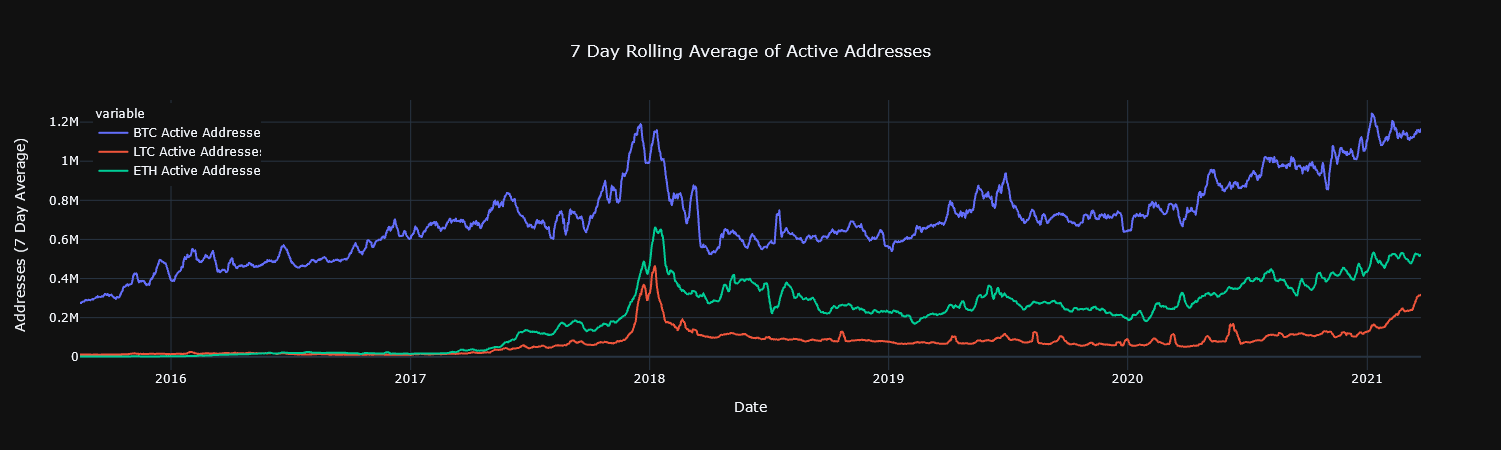

In [77]:
# 7 Day Average of Active Addresses Plot
active_addresses_plot = px.line(active_addresses_rolling_7day_avg_data, 
                                labels = {"value": "Addresses (7 Day Average)"}, 
                                title="Daily Active Addresses", 
                                template = 'plotly_dark')
active_addresses_plot.update_layout(
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01), 
    title={'text': "7 Day Rolling Average of Active Addresses",'y':0.9,'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
active_addresses_plot

## Plot of Daily Coin Price 

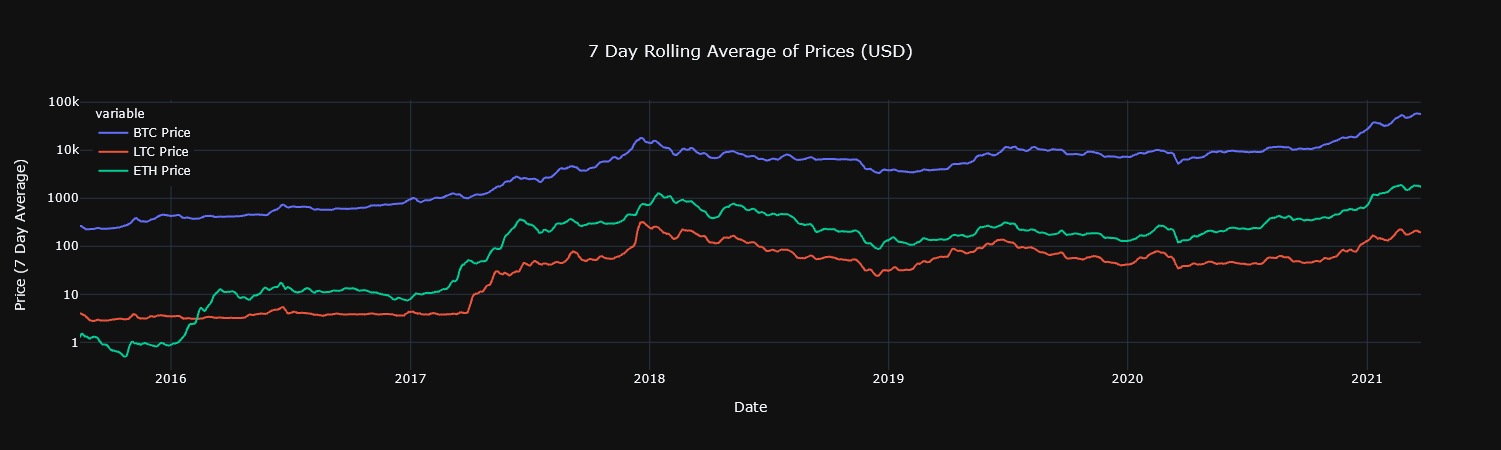

In [79]:
# 7 Day Average of Active Addresses Plot
price_plot = px.line(price_rolling_7day_avg_data, 
                                labels = {"value": "Price (7 Day Average)"}, 
                                title="Daily Price of Coin", 
                                template = 'plotly_dark', 
                                log_y=True)
price_plot.update_layout(
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01), 
    title={'text': "7 Day Rolling Average of Prices (USD)",'y':0.9,'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
price_plot

## Price & Address Correlation Table

In [92]:
address_price_corr_data = [active_addresses_rolling_7day_avg_data, price_rolling_7day_avg_data]
address_price_corr_data_concat = pd.concat(address_price_corr_data, axis=1, join="outer", ignore_index=False).dropna()
address_price_corr_data_concat.head()

,BTC Active Addresses,LTC Active Addresses,ETH Active Addresses,BTC Price,LTC Price,ETH Price
Date,,,,,,
2015-08-15,274503.714286,11738.571429,1306.428571,266.311671,3.951456,1.296296
2015-08-16,276151.285714,11768.857143,1373.714286,265.021830,3.967610,1.417738
2015-08-17,274869.000000,11548.571429,1409.714286,263.858421,3.969810,1.490192
2015-08-18,279612.571429,11694.857143,1260.428571,256.799939,3.862724,1.497940
2015-08-19,281108.714286,11629.142857,1324.000000,251.094456,3.787753,1.503684


In [93]:
addresses_price_corr_table = address_price_corr_data_concat.corr()
addresses_price_corr_table

,BTC Active Addresses,LTC Active Addresses,ETH Active Addresses,BTC Price,LTC Price,ETH Price
BTC Active Addresses,1.000000,0.737196,0.792457,0.747534,0.633224,0.686868
LTC Active Addresses,0.737196,1.000000,0.856328,0.747598,0.899586,0.832020
ETH Active Addresses,0.792457,0.856328,1.000000,0.747859,0.805609,0.775724
BTC Price,0.747534,0.747598,0.747859,1.000000,0.698267,0.892730
LTC Price,0.633224,0.899586,0.805609,0.698267,1.000000,0.844701
ETH Price,0.686868,0.832020,0.775724,0.892730,0.844701,1.000000


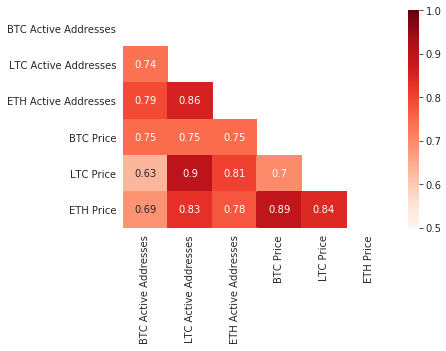

In [197]:
def get_address_price_heatmap():
    mask = np.zeros_like(addresses_price_corr_table)
    mask[np.triu_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        address_price_heatmap = sns.heatmap(addresses_price_corr_table, mask=mask, vmin=.5,  vmax=1, cmap="Reds",  annot=True, cbar = True, cbar_kws={"orientation": "vertical"})
        plt.close()
    return address_price_heatmap.figure

get_address_price_heatmap()

Launching server at http://localhost:54073


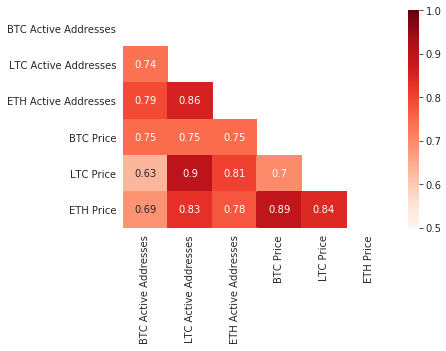

In [196]:
# Put Heatmaps in a single row
row_of_heatmap = pn.Row(get_address_price_heatmap, background='WhiteSmoke')
row_of_heatmap.show()

In [ ]:
# Put bar plots in row
row_of_bar = pn.Row(num_foreclosures_plot)
row_of_bar.append(num_sales_plot)

In [ ]:
# Insert row_of_parallel and row_of_Bar into a column object with Markdown text
plots_as_column = pn.Column(
    "# Allegheny Real Estate Dashboard", row_of_parallel, row_of_bar
)

In [ ]:
# Create tabs
tabs = pn.Tabs(
    ("All Plots", plots_as_column),
    ("General Plots", row_of_bar),
    ("Statistical Plots", row_of_parallel)
)
tabs